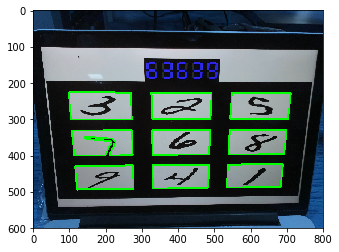

In [1]:
# Load Neccessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import caffe

def show(img_obj):
    plt.imshow(img_obj)
    plt.show()

img = cv2.imread('./test2.jpg')
img = cv2.resize(img, (800,600))
img_cp = img.copy()
img_cp2 = img.copy()
img_cp3 = img.copy()
img_cp4 = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret3,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# Filter out contours that are either too big or too small
contours = [cnt for cnt in contours if cv2.contourArea(cnt) >= 100*50 and cv2.contourArea(cnt) <= 180*90]
cv2.drawContours(img_cp3, contours, -1, (0,255,0), 3)
show(img_cp3)

8


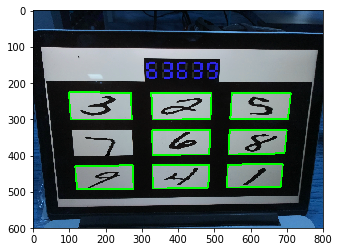

In [9]:
# First Approach: adjusting epsilon
# 似乎并不行 —— 理论上来说矫正需要矫正 Epsilon 来使 Ramer–Douglas–Peucker 算法的误差增加，但是同时会影响到正常 approx。
# Epsilon = 0.05%
tmp = []
for cnt in contours:
    epsilon = 0.05*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    if len(approx) == 4 and cv2.isContourConvex(approx):
        tmp.append(approx)
print len(tmp)
contours1 = np.array(tmp)[:,:,0,:]
cv2.drawContours(img_cp, contours1, -1, (0,255,0), 3)
show(img_cp)

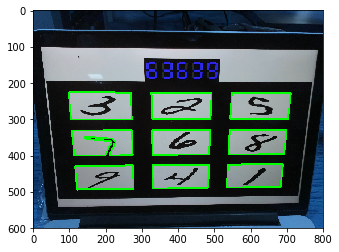

9


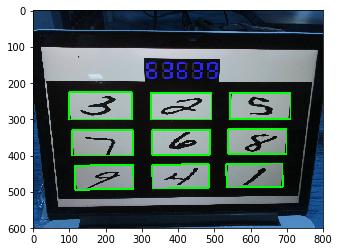

In [10]:
#Second Approach: Bounding Rect
print len(contours)
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_cp4,[box],0,(0,255,0),3)
show(img_cp4)

In [ ]:
#Third Approach: Convex Hull
pass

In [ ]:
#Fourth Approach: Morphological Closing
# 找出 contours 之后，处理成内 1 外 0 的灰度 numpy，再根据矩形宽度（max(x) - min(x)）得到 kernel，做 closing 后再还原成 contours 再 Approx。
def contour_2_gray(contour_array):
    pass

# Must be closed
def gray_2_contour(gray_np_array):
    pass